### Scatter Plot ITU estimated QoE

In [1]:
import pandas as pd
import numpy as np

import copy


data = pd.read_csv('Dataset/itu_Estimted_QoE.csv')
display(data.shape)

display(data.head(5))

(2090, 4)

,Unnamed: 0,FEEDBACK_VALUE,YOUTUBE_AUTO_MOS,QoE_itu
0,0,1,5,3.119406
1,1,3,5,4.282069
2,2,2,5,4.278156
3,3,3,5,4.278085
4,4,2,5,4.275066


### Draw IUT in axis and Feedback in y-axe for every 0.5 slot along axis x

In [5]:
# Create Dataframe
#mx_UserMoS_ITU = copy.deepcopy(data[['FEEDBACK_VALUE','QoE_itu']].values)
mx_UserMoS_ITU = copy.deepcopy(data[['FEEDBACK_VALUE','QoE_itu']])
#print(mx_UserMoS_ITU.head(5))

sorted_UserMoS_ITU = mx_UserMoS_ITU.sort_values('QoE_itu', ascending=True)

#print(sorted_UserMoS_ITU.head(50))

# Standard deviation
stdev = np.std(np.hstack(sorted_UserMoS_ITU['QoE_itu'].values.reshape(-1, 1)))

#print("Standard deviation : ", stdev)

axis_x = np.arange(1, 5, 0.5)
# df_itu = pd.DataFrame({'MoS': matrix_QoE_itu_val, 'ITU': matrix_QoE_itu_val})
# df_itu['MoS'] = df_itu.loc[:, 'MoS'].apply(lambda x: _map_mos(x))

# #display(df_itu.head(10))
ax = sns.lineplot(x="QoE_itu", y="FEEDBACK_VALUE", data=sorted_UserMoS_ITU, ci="sd", markers=True, dashes=False)
axes = lm.ax
# axes[0,0].set_xlim(-100,1000)
axes[0,0].set_xlim(1, 5)
#plt.xlim(1, 5)

NameError: name 'sns' is not defined

In [3]:
from sklearn.preprocessing import KBinsDiscretizer

X = copy.deepcopy(data['QoE_itu'].values.reshape(-1, 1))
est = KBinsDiscretizer(n_bins=5, encode='ordinal', strategy='quantile')
#est = KBinsDiscretizer(n_bins=5, encode='ordinal', strategy='kmeans')
est = est.fit(X)
Xt = est.transform(X)

#display(est.bin_edges_[0])
display(est.bin_edges_)
#display(Xt)

array([array([1.54095314, 1.8877958 , 2.18920041, 2.4935248 , 3.42301183,
       4.28206859])], dtype=object)

In [4]:
data['itu_QoE_Class'] = Xt + 1
#display(data.head(100))
#display(data.shape)

(0, 6)

<Figure size 864x432 with 0 Axes>

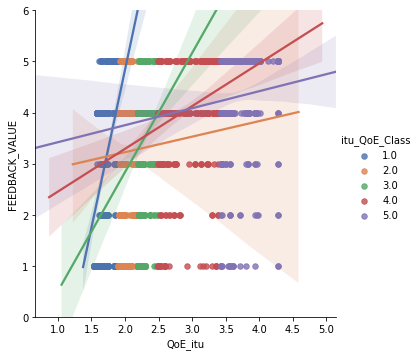

In [9]:
import copy
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
# sns.set(style='whitegrid', palette='hsv')
# plt.figure(figsize=(16, 6))

# FB 1
#mos_feedback = 1
#data = copy.deepcopy(data[data['FEEDBACK_VALUE'] == mos_feedback])
# col_qoe_itu = df_user_fb_1['QoE_itu']
# median_1 = np.median(col_qoe_itu)
# mean = np.mean(col_qoe_itu)
# maximum = np.max(col_qoe_itu)
# minimum = np.min(col_qoe_itu)
plt.figure(figsize=(12, 6))

# Basic plot visualization
# lm = sns.lmplot(x='QoE_itu', y='FEEDBACK_VALUE', hue='itu_QoE_Class', data=data, palette='deep', legend=True, \
#           logistic=False, height=6, aspect=2, scatter_kws={"s": 30})

lm = sns.lmplot(x='QoE_itu', y='FEEDBACK_VALUE', hue='itu_QoE_Class', data=data, palette='deep', scatter_kws={"s": 30})

axes = lm.axes
# axes[0,0].set_xlim(-100,1000)
axes[0,0].set_ylim(0,6)



### BIN Ranges

In [5]:
bin_range = np.hstack(est.bin_edges_)

#print('Bin shape', bin_range[0])

matrix_QoE_itu = np.sort(np.hstack(copy.deepcopy(data['QoE_itu'].values.reshape(-1, 1))))
print(matrix_QoE_itu.shape)

#display(matrix_QoE_itu)

# print(matrix_QoE_itu)
mean_value = []
std_err = []
for i in np.arange(0, 5, 1):
    idx = np.where(np.logical_and(matrix_QoE_itu >= bin_range[i], matrix_QoE_itu < bin_range[i+1]))
    abc = matrix_QoE_itu[idx]
    mean = np.mean(abc)
    mean_value.append(mean)
    std_err.append(np.std(abc))
    print(abc, mean, std)

sns_lineplot = sns.relplot(x='Mean', y='FB', kind="line", data=pd.DataFrame({'Mean': mean_value, "FB":[1, 2, 3, 4, 5]}))
# print(mean_value)

plt.plot(mean_value, [1, 2, 3, 4, 5], '+')
#plt.plot(x, lowess)
# #plt.fill_between(x,ll,ul,alpha=.33)
# plt.show()


(2090,)


NameError: name 'std' is not defined

Mean value : [1.708426422243873]
1.6162217213596612


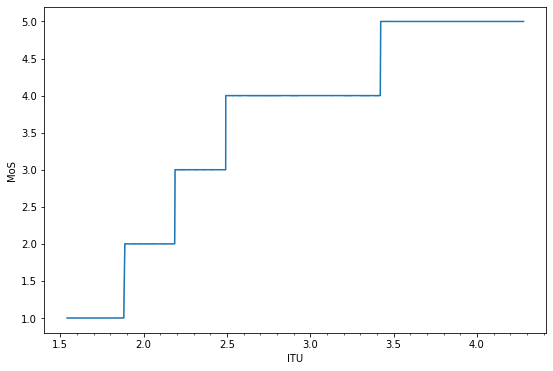

In [46]:
bin_range = np.hstack(est.bin_edges_)

#print(matrix_QoE_itu.shape)
def _map_mos(x):
    
    for i in np.arange(0, 5, 1):
        if (x >= bin_range[i] and x < bin_range[i+1]):
            return i+1
        else: -1

# Create Dataframe
matrix_QoE_itu = np.sort(np.hstack(copy.deepcopy(data['QoE_itu'].values.reshape(-1, 1))))
df_itu = pd.DataFrame({'MoS': matrix_QoE_itu, 'ITU': matrix_QoE_itu})

# Convert estimated ITU to user feedback MOS
df_itu['MoS'] = df_itu.loc[:, 'MoS'].apply(lambda x: _map_mos(x))

# Set the figure size
plt.figure(figsize = (9, 6))

#display(df_itu.head(10))
lm = sns.lineplot(x="ITU", y="MoS", data=df_itu, ci="sd", markers=True, dashes=False)
#ax = sns.lineplot(x="MoS", y="ITU", data=df_itu, ci="sd", markers=True, dashes=False)

# Customize ticks
from matplotlib.ticker import AutoMinorLocator, FormatStrFormatter
ax = lm.axes
ax.xaxis.set_minor_locator(AutoMinorLocator())
#ax.yaxis.set_minor_locator(AutoMinorLocator())

#err_style="bars", 

# Add std deviation bars to the previous plot
#mean = df_itu['ITU'].mean()
#std  = df_itu['ITU'].std()
#ax.errorbar(df_itu.index, mean, yerr=std, fmt='-o') #fmt=None to plot bars only

#dyfit  = df_itu['ITU'].std()
#yfit = df_itu['ITU']
#plt.fill(df_itu['MoS'], yfit - dyfit, yfit + dyfit, color='gray', alpha=0.2)

### Plot User Feedback versus mean value of each bin
#plt.plot([1, 2, 3, 4, 5], mean_value, 'r*')

### Plot User Feedback versus mean value of each bin
print('Mean value :', mean_value)
#plt.plot(mean_value, [1, 2, 3, 4, 5], 'r*')

# 
from operator import sub
for x, y in zip(mean_value, std_err):
    print(x-y)

# Plot standard deviation error
plt.errorbar([1, 2, 3, 4, 5], mean_value, yerr=std_err, label='both limits (default)')
#plt.plot([1, 2, 3, 4, 5], [sum(x) for x in zip(mean_value, std_err)], 'r+')

#plt.errorbar(mean_value, [1, 2, 3, 4, 5], yerr=std_err, label='both limits (default)')
#plt.plot([1, 2, 3, 4, 5], [x - y   for x, y in zip(mean_value, std_err)], 'r+')

#print(mean, std)
# Show plot
plt.show()

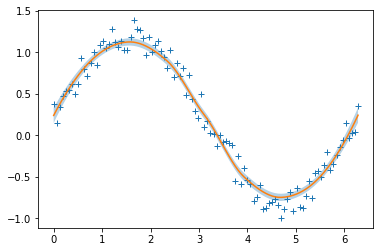

In [112]:
import numpy as np
import pylab as plt
from skmisc.loess import loess

x = np.linspace(0,2*np.pi,100)
y = np.sin(x) + np.random.random(100) * 0.4

l = loess(x,y)
l.fit()
pred = l.predict(x, stderror=True)
conf = pred.confidence()

lowess = pred.values
ll = conf.lower
ul = conf.upper

plt.plot(x, y, '+')
plt.plot(x, lowess)
plt.fill_between(x,ll,ul,alpha=.33)
plt.show()

,Unnamed: 0,FEEDBACK_VALUE,YOUTUBE_AUTO_MOS,QoE_itu,itu_QoE_Class
0,0,1,5,3.119406,4.0
9,9,1,5,4.278536,5.0
10,10,1,5,4.278076,5.0
30,30,1,5,2.554578,4.0
59,59,1,1,1.639789,1.0


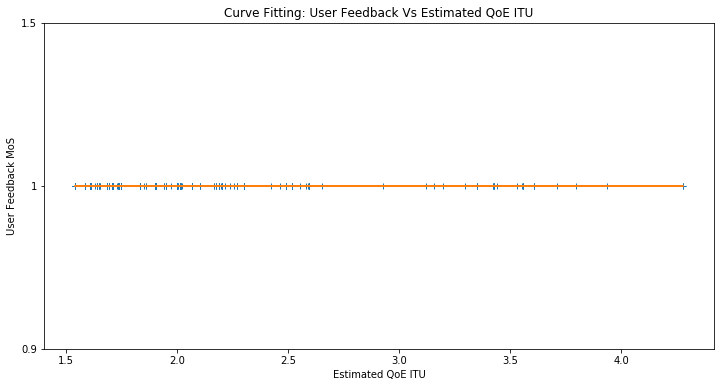

In [94]:
import numpy as np
import pylab as plt
from skmisc.loess import loess

#data['FEEDBACK_VALUE'] =  data[data['FEEDBACK_VALUE']==1]

mos_feedback = 4
#data2 = copy.deepcopy(data[data['FEEDBACK_VALUE'] == mos_feedback])
#data2 = copy.deepcopy(data[(data['FEEDBACK_VALUE'] == 1) | (data['FEEDBACK_VALUE'] == 2) | (data['FEEDBACK_VALUE'] == 3) | (data['FEEDBACK_VALUE'] == mos_feedback) | (data['FEEDBACK_VALUE'] == mos_feedback+1)])

data2 = copy.deepcopy(data[(data['FEEDBACK_VALUE'] == 1)])# | (data['FEEDBACK_VALUE'] == 2) | (data['FEEDBACK_VALUE'] == 3) | (data['FEEDBACK_VALUE'] == mos_feedback) | (data['FEEDBACK_VALUE'] == mos_feedback+1)])

display(data2.head(5))

x = data2['QoE_itu']
y = data2['FEEDBACK_VALUE']

l = loess(x,y)
l.fit()
pred = l.predict(x, stderror=True)
#pred = l.predict(x)
conf = pred.confidence()

lowess = pred.values
ll = conf.lower
ul = conf.upper

plt.figure(figsize=(12, 6))
plt.plot(x, y, '+')
plt.plot(x, lowess)
plt.fill_between(x,ll,ul,alpha=.33)

y = [0.9, 1, 1.5]
# create an index for each tick position
yi = list(range(len(y)))
plt.yticks(yi, y)

plt.title('Curve Fitting: User Feedback Vs Estimated QoE ITU')
#plt.legend() 
plt.xlabel('Estimated QoE ITU')
plt.ylabel('User Feedback MoS') 

plt.show()

No handles with labels found to put in legend.


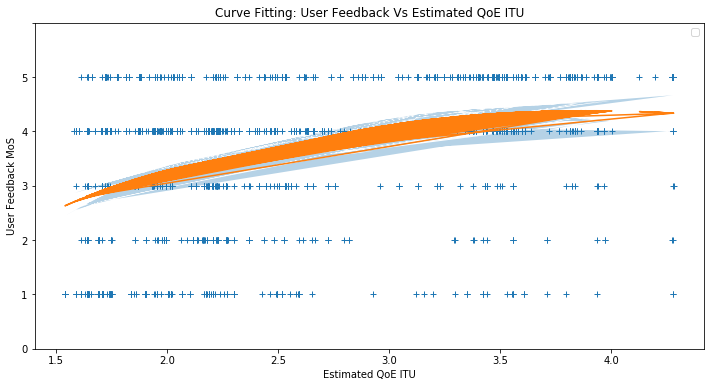

array([4.18439403, 4.33350637, 4.33443789, ..., 3.44797067, 4.22414451,
       4.08032253])

array([4.18439403, 4.33350637, 4.33443789, ..., 3.44797067, 4.22414451,
       4.08032253])

array([  0.        , 271.44      ,   0.        , ...,  -0.44797067,
        -3.22414451,   0.91967747])

In [107]:
import numpy as np
import pylab as plt
from skmisc.loess import loess

#data['FEEDBACK_VALUE'] =  data[data['FEEDBACK_VALUE']==1]

mos_feedback = 4
#data2 = copy.deepcopy(data[data['FEEDBACK_VALUE'] == mos_feedback])
data2 = copy.deepcopy(data[(data['FEEDBACK_VALUE'] == 1) | (data['FEEDBACK_VALUE'] == 2) | (data['FEEDBACK_VALUE'] == 3) | (data['FEEDBACK_VALUE'] == mos_feedback) | (data['FEEDBACK_VALUE'] == mos_feedback+1)])

#data2 = copy.deepcopy(data[(data['FEEDBACK_VALUE'] == 1)])# | (data['FEEDBACK_VALUE'] == 2) | (data['FEEDBACK_VALUE'] == 3) | (data['FEEDBACK_VALUE'] == mos_feedback) | (data['FEEDBACK_VALUE'] == mos_feedback+1)])

#display(data2.head(5))

x = data2['QoE_itu']
y = data2['FEEDBACK_VALUE']

l = loess(x,y)
l.fit()
pred = l.predict(x, stderror=True)
conf = pred.confidence()

lowess = pred.values
ll = conf.lower
ul = conf.upper

plt.figure(figsize=(12, 6))
plt.plot(x, y, '+')
plt.plot(x, lowess)
plt.fill_between(x,ll,ul,alpha=.33)

y = [0, 1, 2, 3, 4, 5]
# create an index for each tick position
yi = list(range(len(y) + 1))
plt.yticks(yi, y)

#
plt.title('Curve Fitting: User Feedback Vs Estimated QoE ITU')
plt.legend() 
plt.xlabel('Estimated QoE ITU')
plt.ylabel('User Feedback MoS') 
plt.show()

#output_summary
#test = l.output_summary()
#display(test)
display(l.outputs.fitted_values)

# Predicted y
display(lowess)

display(l.outputs.diagonal)
